## Bulk functional analysis for Control = 10mix and perturbation = 11mix

In [1]:
import pandas as pd
pd.set_option('display.max_rows', 500)

### Import libraries

In [2]:
import decoupler as dc

# Only needed for visualization:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scanpy as sc
#import scanpy_helpers as sh
import seaborn as sns
from itertools import zip_longest
from anndata import AnnData
from matplotlib import collections  as mc

/home/kvalem/.local/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
path = "/data/projects/2023/Pseudomonas_aeruginosa/deseq2icbi"
resDir = "/data/projects/2023/Pseudomonas_aeruginosa/40_review/"
input_path = f"{path}/"

In [4]:
database_dir = "/data/projects/2023/Pseudomonas_aeruginosa"
data_dir = (
    f"{database_dir}/20_deseq2icbi/07_deseq2_batch_effect_volcano_names"
)
counts_file  = (
    f"{database_dir}/10_rnaseq_pipeline/star_salmon/salmon.merged.gene_counts.tsv"
)


In [5]:
counts = pd.read_csv(counts_file, sep = "\t")

In [6]:
# Separate metadata and numeric columns
metadata = counts[['gene_id', 'gene_name']]
counts_data = counts.drop(['gene_id', 'gene_name'], axis=1)

# Convert all count columns to numeric, handling any non-numeric values as NaN
counts_data = counts_data.apply(pd.to_numeric, errors='coerce')

# Drop columns with all NaN values, if any
counts_data = counts_data.dropna(how='all', axis=1)

# Calculate CPM
counts_sum = counts_data.sum(axis=0)  # Sum of counts for each sample
cpm = counts_data.div(counts_sum, axis=1) * 1e6  # Calculate CPM per sample

# Log2 transform (adding 1 to avoid log(0))
log2_cpm = np.log2(cpm + 1)

# Reattach metadata columns
log2_cpm_final = pd.concat([metadata, log2_cpm], axis=1)

In [7]:
tpm = log2_cpm_final

### Log2 transform CPM

In [8]:
log2_cpm_final = log2_cpm_final[log2_cpm_final["gene_id"]=="ENSG00000137699.17"]

In [9]:
log2_cpm_final

,gene_id,gene_name,COPD_r1_ctrl,COPD_r1_inf,COPD_r2_ctrl,COPD_r2_inf,COPD_r3_ctrl,COPD_r3_inf,COPD_r4_ctrl,COPD_r4_inf,hAO_r1_ctrl,hAO_r1_inf,hAO_r2_ctrl,hAO_r2_inf,hAO_r3_ctrl,hAO_r3_inf,hAO_r4_ctrl,hAO_r4_inf
7509,ENSG00000137699.17,TRIM29,7.665389,7.662505,7.002987,7.065839,7.212876,7.125302,7.399444,7.57767,7.814328,7.976903,7.427744,7.471113,7.591812,7.590886,7.570653,7.931977


In [10]:
log2_cpm_final = log2_cpm_final.loc[:, ~log2_cpm_final.columns.str.startswith("COPD")]


In [11]:
log2_cpm_final = log2_cpm_final.iloc[:,2:]

In [12]:
log2_cpm_final

,hAO_r1_ctrl,hAO_r1_inf,hAO_r2_ctrl,hAO_r2_inf,hAO_r3_ctrl,hAO_r3_inf,hAO_r4_ctrl,hAO_r4_inf
7509,7.814328,7.976903,7.427744,7.471113,7.591812,7.590886,7.570653,7.931977


In [13]:
log2_cpm_final = log2_cpm_final.T

In [14]:
log2_cpm_final = log2_cpm_final.rename(columns={7509: "expression"})

In [15]:
log2_cpm_final = log2_cpm_final.reset_index()

In [16]:
df = pd.DataFrame(log2_cpm_final)

# Creating the new columns based on the specified transformation
df['sample'] = df['index'].str.split('_').str[:2].str.join('_')  # Extract "hAO_rX" part
df['condition'] = df['index'].str.split('_').str[2]  # Extract "ctrl" or "inf" part

/tmp/ipykernel_2685123/3076028897.py:8: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  sns.pointplot(data=df, x="condition", y=df.columns[1], hue = "sample",dodge=True, scale = 1)


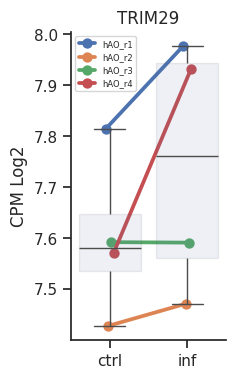

In [23]:
sns.set(rc={'figure.figsize':(2,4)})
sns.set(font_scale=0.9)
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
#sns.set_style("whitegrid")
sns.set_theme(style="ticks", rc=custom_params)

plt.title("TRIM29")
sns.pointplot(data=df, x="condition", y=df.columns[1], hue = "sample",dodge=True, scale = 1)
sns.boxplot(data=df, x="condition",  y=df.columns[1], dodge=True, boxprops=dict(alpha=.1))

plt.xlabel("")
plt.ylabel("CPM Log2")
plt.legend(fontsize='6')
plt.savefig('output.png', dpi=500, bbox_inches='tight')